## Antony Owino. Final Paper. 13<sup>th</sup> Dec 2017. Notebook 2.

#### NB: Assumes the [first notebook (*Analysis of Viewers Searching for Music Heard On Contemporary TV.ipynb* )](Analysis of Viewers Searching for Music Heard On Contemporary TV.ipynb) has been run to generate required files.

These are several ways viewers ask in order to identify soundtracks, source music, melodies or any other type of music that was featured in the TV show. One distinctive format was by using a time delimiter like **25:34** to mean the actual time they heard the song. In a way, I argue that majority of the viewers watch via a medium that keeps track of time and some TV shows prefer particular times of the show to feature new music as soundtrack.

In [1]:
import csv, os, errno, shutil
from itertools import groupby
from operator import itemgetter

current_working_dir = os.getcwd()

shows = ["Supernatural",
         "Game of Thrones",
         "The Walking Dead",
         "Stranger Things",
         "Grey's Anatomy",
         "Arrow",
         "Suits",
         "The Originals",
         "Pretty Little Liars"]

### Create utility functions for parsing the data

In [2]:
def extract_questions_as_text(show_file_path, r_no=4):
    '''
    This function extracts all the questions in a given file as
    a concatenated string.
    show_file_path - Path to the file
    r_no - Row number in the CSV file with questions
    '''
    questions_text = ''
    with open(show_file_path, 'r') as file: # This makes sure that file is closed after reading
        data = csv.reader(file)
        next(data) #  skip the header row
        for row in data:
            questions_text += row[r_no] # This puts all the data into a list
        file.close() 
    return questions_text

def extract_timelike_data(questions_text):
    '''
    Given a text, this function extract 'time-like' strings 
    into a list
    '''
    times = re.findall(r"\d\d:\d\d", questions_text)
    times = [str(x) for x in times]
    times.sort()
    return times

def convert_timelike_to_int(times):
    '''
    The 'time-like' strings are not numbers that can be graphed.
    We need to convert them to their numerical equivalents and round
    them off.
    '''
    times_list = []
    for time in times:
        times_list.append(round(calc_hour(time)))
    return times_list

def calc_hour(str):
    '''
    Given a 'time-like' string, this function splits it into two
    extract minutes and seconds into minutes as an integer
    '''
    min, sec = [int(i) for i in str.split(':')]
    min += sec/60.
    return min

def create_full_timefreqs(times_list, show_duration=60):
    '''
    The extracted times need to be slotted properly within the
    show duraction in order to plotted as frequencies over time.
    times_list - The list of all extracted time frequencies on a file as integers
    show_duration - The runtime of a show. Default is 60 minutes
    '''
    freqs_of_timenote = []
    for n in range(show_duration):
        word_freq_count = times_list.count(n)
        freqs_of_timenote.append(word_freq_count)
    return freqs_of_timenote

### Plotting the frequency of 'time-like' instances in questions on all the TV shows

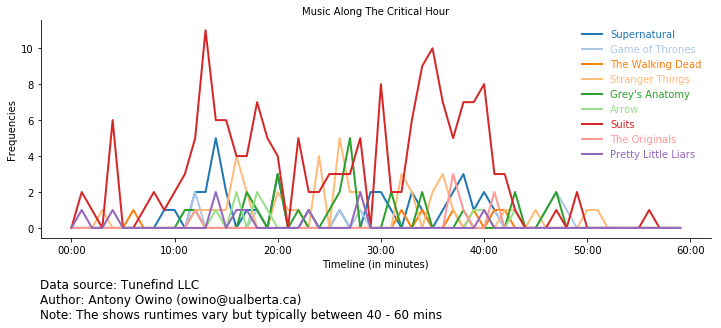

In [3]:
import re
import numpy as np
import matplotlib.pyplot as plt

# set the canvas area of the line graphs
plt.figure(figsize=(12, 4))

# Remove the plot frame lines
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)  

# These are the "Tableau 10" colors as RGB.  
tableau10 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213)]  

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau10)):  
    r, g, b = tableau10[i]  
    tableau10[i] = (r / 255., g / 255., b / 255.)

show_freqs = [] # list to hold the determined show frequencies
for show_name in shows: # get each of the shows in the list
    show_file = os.path.join(show_name, show_name + ".csv")
    questions_text = extract_questions_as_text(show_file) # extract text
    times = extract_timelike_data(questions_text) # extract 'time-like' strings
    times_list = convert_timelike_to_int(times) # convert 'times' to integer
    full_freqs = create_full_timefreqs(times_list) # contextualize the frequencies on the show runtime
    show_freqs.append(full_freqs)

show_plots = []
for order, show_freq in enumerate(show_freqs): # iteration that plots frequency for each show
    line = plt.plot(show_freq,label=shows[order], color=tableau10[order], lw=2)[0]
    show_plots.append(line)
plt.title('Music Along The Critical Hour', fontsize=10) # Plot Title

plt.legend(handles=show_plots)

leg = plt.legend(framealpha = 0, loc = 'best')
for idx, text in enumerate(leg.get_texts()): #  set matching color on the legend labels
    text.set_color(tableau10[idx])

plt.xlabel('Timeline (in minutes)') # X Axis Label
plt.ylabel('Frequencies') # Y Axis Label
plt.xticks([w*10 for w in range(7)], ['%i0:00'%w for w in range(7)], rotation='horizontal') # Re-labeling the X-Axis ticks

plt.text(-3, -5, "Data source: Tunefind LLC"  
       "\nAuthor: Antony Owino (owino@ualberta.ca)"  
       "\nNote: The shows runtimes vary but typically between 40 - 60 mins", 
         fontsize=12) 

plt.show() 

 ### Plotting the frequency of 'time-like' instances in questions per episode for _Suits_ over the seven seasons.

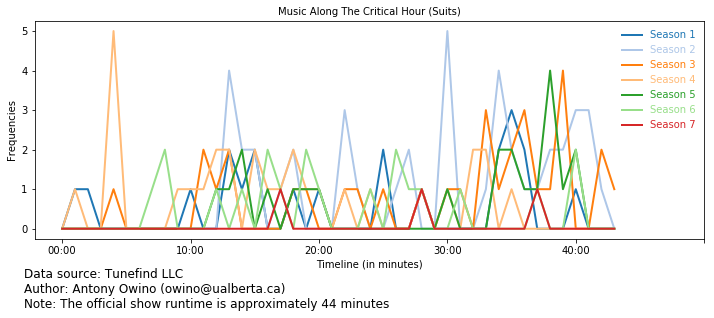

In [4]:
import glob, os
import pandas as pd

plt.figure(figsize=(12, 4))

# Read the show's directory for all Season files
all_seasons_files = glob.glob(os.path.join(current_working_dir, "Suits/Season *.csv"), recursive=False)
# sort the files to processing them in chronological order
all_seasons_files = sorted(all_seasons_files)

season_freqs = []
for idx, season_file in enumerate(all_seasons_files):
    questions_text = extract_questions_as_text(season_file, r_no=1)
    times = extract_timelike_data(questions_text)
    times_list = convert_timelike_to_int(times)
    full_freqs = create_full_timefreqs(times_list, show_duration=44)
    season_freqs.append(full_freqs)

# create a seasons list to be used as legend labels
seasons = ["Season {}".format(i) for i in range(1, len(all_seasons_files)+1)]

season_plots = []
for order, season_freq in enumerate(season_freqs): 
    line = plt.plot(season_freq,label=seasons[order], color=tableau10[order], lw=2)[0]
    season_plots.append(line)
plt.title('Music Along The Critical Hour (Suits)', fontsize=10) # Plot Title

plt.legend(handles=season_plots)

leg = plt.legend(framealpha = 0, loc = 'best')
for idx, text in enumerate(leg.get_texts()):
    text.set_color(tableau10[idx])

plt.xlabel('Timeline (in minutes)') # X Axis Label
plt.ylabel('Frequencies') # Y Axis Label
plt.xticks([w*10 for w in range(6)], ['%i0:00'%w for w in range(5)], rotation='horizontal', fontsize=10) # Re-labeling the X-Axis ticks

plt.text(-3, -2, "Data source: Tunefind LLC"  
       "\nAuthor: Antony Owino (owino@ualberta.ca)"  
       "\nNote: The official show runtime is approximately 44 minutes", 
         fontsize=12) 

plt.show() 

 ### Plotting the frequency of 'time-like' instances in questions per episode for _Suits_ over the seven seasons. Using histograms.

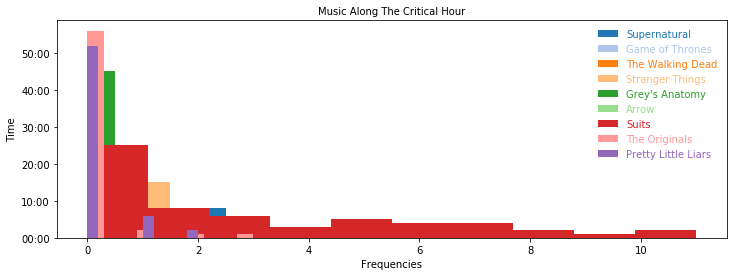

In [5]:
plt.figure(figsize=(12, 4))
plt.title('Music Along The Critical Hour', fontsize=10) # Plot Title
plt.yticks([w*10 for w in range(6)], ['%i0:00'%w for w in range(6)]) # Re-labeling the X-Axis ticks
plt.xlabel('Frequencies') # X Axis Label
plt.ylabel('Time') # Y Axis Label

for order, show_freq in enumerate(show_freqs): 
    plt.hist(show_freqs[order], label=shows[order], color=tableau10[order])

plt.legend(handles=show_plots)

leg = plt.legend(framealpha = 0, loc = 'best')
for idx, text in enumerate(leg.get_texts()):
    text.set_color(tableau10[idx])

plt.show()

### [Go back to Notebook 1](Analysis of Viewers Searching for Music Heard On Contemporary TV.ipynb)

### [Go to Notebook 3 (Concordances)](Analysis of Viewers Searching for Music Heard On Contemporary TV - Concordances.ipynb)